# Perceptron for regression

This notebook presents how to build neural network perceptron for classification problem. 
We will classify 2 sets of points on surface which can be separated by a line (linearly separable).

This work is based on examples from course https://www.coursera.org/learn/machine-learning-calculus prepared by author Luis Serrano.


In [3]:
import numpy as np
np.random.seed(345)

<a name='2'></a>
## Maths behind the single Perceptron Neural Network with Activation Function

Linear separation refers to data points in binary classification problems that can be separated by a linear decision boundary. If the data points can be separated by a line, linear function, or flat hyperplane, they are said to be linearly separable.

If separate points in an n-dimensional space exist, then it is said to be linearly separable 

$$w_1x_1 + w_2x_2 + w_nx_n + b = 0$$

For two-dimensional input data, if there is a line, whose equation is $$w_1x_1 + w_2x_2 + b = 0$$

that separates all samples of one class from the other class, then the corresponding observation can be derived from the equation of the separating line. Such classification problems are called "linearly separable", i.e. separating by linear combination.

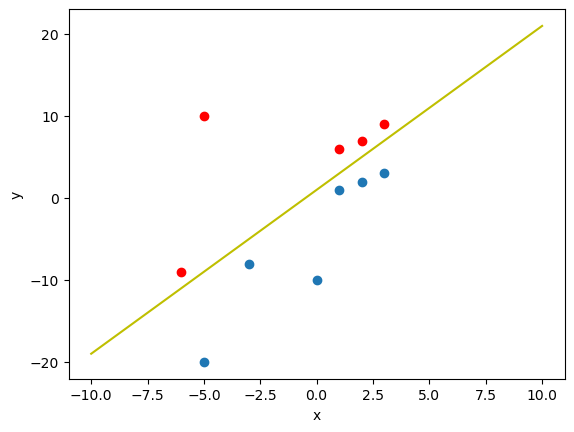

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10, 10, 50)
plt.xlabel('x')
plt.ylabel('y')
ax = plt.subplot(1, 1, 1)
ax.scatter([1, 2, 3, -5, 0, -3], [1, 2, 3, -20, -10, -8])
ax.scatter([1, 2, 3, -5, -6], [6, 7, 9, 10, -9], color='r', marker='o')
plt.plot(x, 2*x+1, 'y')
plt.show()



The input layer contains two nodes $x_1$ and $x_2$. Weight vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$ and bias ($b$) are the parameters to be updated during the model training.

$$z^{(i)} = w_1x_1^{(i)} + w_2x_2^{(i)} + b = Wx^{(i)} + b.\tag{1}$$


To be able to perform classification we need nonlinear approach. This can achieved with sigmoid activation function which roughly replace values with nearly 0 or nearly 1 for most cases and some values between for small range near 0. 

$$\hat{y} = \begin{cases} 1 & \mbox{if } a > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{10}$$
 
Sigmoid activation function is defined as

$$a = \sigma\left(z\right) = \frac{1}{1+e^{-z}}.\tag{2}$$



sigmoid(0) = 0.52497918747894
sigmoid(0) = 0.47502081252106
sigmoid(-2) = 4.5397868702434395e-05
sigmoid(3.5) = 0.9933071490757153


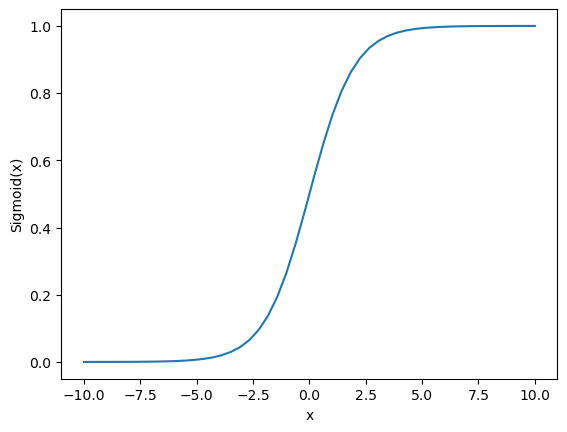

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

print("sigmoid(0) = " + str(sigmoid(0.1)))
print("sigmoid(0) = " + str(sigmoid(-0.1)))
print("sigmoid(-2) = " + str(sigmoid(-10)))
print("sigmoid(3.5) = " + str(sigmoid(5)))

x = np.linspace(-10, 10, 50)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.plot(x, sigmoid(x))
plt.show()

Threshold value of $0.5$ can be used for predictions: $1$ (red) if  $a > 0.5$ and $0$ (blue) otherwise. 

The single perceptron neural network with sigmoid activation function can be expressed as:

\begin{align}
z^{(i)} &=  W x^{(i)} + b,\\
a^{(i)} &= \sigma\left(z^{(i)}\right).\\\tag{3}
\end{align}

With $m$ training examples organised in the columns of ($2 \times m$) matrix $X$, you can apply the activation function element-wise. So the model can be written as:

\begin{align}
Z &=  W X + b,\\
A &= \sigma\left(Z\right),\\\tag{4}
\end{align}

When dealing with classification problems, the most commonly used cost function is the **log loss**, which is described by the following equation:

$$\mathcal{L}\left(W, b\right) = \frac{1}{m}\sum_{i=1}^{m} L\left(W, b\right) = \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small -y^{(i)}\log\left(a^{(i)}\right) - (1-y^{(i)})\log\left(1- a^{(i)}\right)  \large  \right) \small,\tag{5}$$

where $y^{(i)} \in \{0,1\}$ are the original labels and $a^{(i)}$ are the continuous output values of the forward propagation step (elements of array $A$).

We want to minimize the cost function during the training. To implement gradient descent, calculate partial derivatives using chain rule:



\begin{align}
\frac{\partial \mathcal{L} }{ \partial w_1 } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right)x_1^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial w_2 } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right)x_2^{(i)},\tag{7}\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right).
\end{align}

Equations above can be rewritten in a matrix form:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W } &= 
\begin{bmatrix} \frac{\partial \mathcal{L} }{ \partial w_1 } & 
\frac{\partial \mathcal{L} }{ \partial w_2 }\end{bmatrix} = \frac{1}{m}\left(A - Y\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b } &= \frac{1}{m}\left(A - Y\right)\mathbf{1}.
\tag{8}
\end{align}

where $\left(A - Y\right)$ is an array of a shape ($1 \times m$), $X^T$ is an array of a shape ($m \times 2$) and $\mathbf{1}$ is just a ($m \times 1$) vector of ones.



Then you can update the parameters:

\begin{align}
W &= W - \alpha \frac{\partial \mathcal{L} }{ \partial W },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b },
\tag{9}\end{align}

where $\alpha$ is the learning rate. Repeat the process in a loop until the cost function stops decreasing.

in last step apply activation
$$\hat{y} = \begin{cases} 1 & \mbox{if } a > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{10}$$


### Dataset

As a dataset we will generate $m=50$ data points $(x_1, x_2)$, where $x_1, x_2 \in \{0,1\}$ and save them in the `NumPy` array `X` of a shape $(2 \times m)$. The labels ($0$: blue, $1$: red) will be calculated so that $y = 1$ if $x_1 = 1$ and $x_2 = 0$, in the rest of the cases $y=0$. The labels will be saved in the array `Y` of a shape $(1 \times m)$.

X: [[-6.88441621e-02  1.31292161e-01  8.46277867e-01  8.16173450e-01
   1.16442587e+00  9.66994607e-01 -9.30851672e-02  1.07858941e+00
   1.56996314e-01 -1.62584390e-01  9.55996744e-01  1.02634568e+00
   7.04792235e-02 -1.67352292e-01  8.15768482e-01  1.05637207e+00
   1.04421237e-01  1.98378846e-01  1.05594502e+00 -8.11126002e-02
  -3.14767373e-02  1.04476732e+00  5.52456305e-02  7.42342745e-02
   3.91391510e-02 -2.39266268e-02  1.14592744e+00  9.47402634e-01
   1.11171914e+00  9.99315690e-01  9.92421658e-01  8.17371057e-01
  -8.82851653e-02  8.48710739e-01  8.69440630e-01  8.87215977e-02
   1.11981613e+00  8.45791808e-01 -4.09059312e-02  1.54365828e-01
   9.45306828e-01 -1.77570882e-01  1.14860937e+00  1.06964863e-03
  -5.06249099e-02  9.55909525e-01 -8.85003473e-02  1.58926155e-01
   1.02144290e+00 -7.84958537e-02]
 [-1.71819491e-01  9.51209838e-01  9.86126137e-02  1.14324313e-01
   9.13323077e-01  1.50994912e-01  7.98605888e-02 -1.29981927e-01
   1.93508520e-01  1.05845454e+00 -6.2

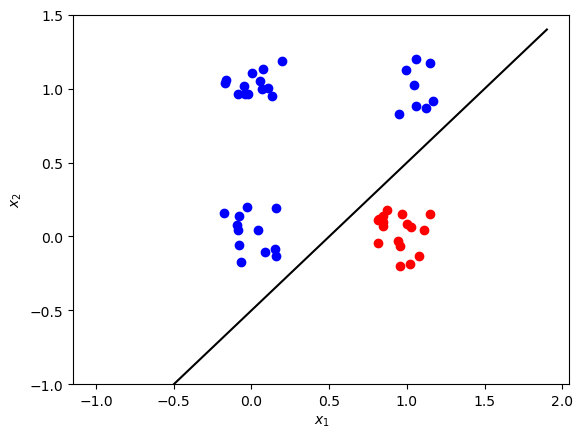

In [6]:
m = 50

X = np.random.randint(0, 2, (2, m))
Y = np.logical_and(X[0] == 1, X[1] == 0).astype(int).reshape((1, m))

# randomize points - add random values from range (-0.2, 0.2)
# this will keep points in similar but not exact positions 
vfunc = np.vectorize(lambda x: x + np.random.uniform(-0.2, 0.2))
X = vfunc(X)

print("X:", X)
print("Y:", Y)

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))

fig, ax = plt.subplots()
x_line = np.arange(-1, 2, 0.1)
# Data points (observations) from two classes.
for idx,x in enumerate(X[0]):
    if Y[0][idx] == 1:
        color = 'r'
    else: 
        color = 'b'
    ax.scatter(x, X[1][idx], color=color)
    
ax.set_ylim([-1, 1.5])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# example line which can be used as a decision boundary to separate two classes.
ax.plot(x_line, x_line - 0.5, color="black")
plt.plot()
plt.show()


## Neural Network Model


### Neural Network Structure

In [7]:
#get size of training set and target
n_x = X.shape[0]
n_y = Y.shape[0]
print(n_x, n_y)

2 1


### Initialize the Model's Parameters

Initialize weights(W) array of shape $(n_y \times n_x) = (1 \times 1)$ with random values and the bias(b) vector of shape $(n_y \times 1) = (1 \times 1)$ with zeros.

In [8]:
def init_params(n_x, n_y):
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    
    return W, b

W, b = init_params(n_x, n_y)
print("W = " + str(W))
print("b = " + str(b))

W = [[ 0.01541429 -0.00872979]]
b = [[0.]]



### Forward propagation


\begin{align}
Z &=  W X + b,\\
A &= \sigma\left(Z\right).
\end{align}

In [9]:
def forward_propagation(X, W, b):
    Z = np.matmul(W, X) + b
    A = sigmoid(Z)

    return A

result = forward_propagation(X, W, b)

print(result)

[[0.50010969 0.49842998 0.50304594 0.50289564 0.5024939  0.50339679
  0.499467   0.50443998 0.50018267 0.49706348 0.50381926 0.50381316
  0.49809336 0.49709585 0.50323502 0.50214733 0.49820452 0.4981712
  0.50145239 0.49939148 0.49944897 0.50179227 0.49791102 0.49781991
  0.50005412 0.49781137 0.5040855  0.50183947 0.50419137 0.50366653
  0.50137254 0.50289768 0.49957095 0.50311289 0.50296107 0.50057681
  0.5024123  0.50295131 0.49774147 0.50078016 0.50370503 0.49896584
  0.50186996 0.49759718 0.49757899 0.50411476 0.49755917 0.50089357
  0.50434412 0.49982458]]


### Logloss cost calculation

$$\mathcal{L}\left(W, b\right)  = \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small -y^{(i)}\log\left(a^{(i)}\right) - (1-y^{(i)})\log\left(1- a^{(i)}\right)  \large  \right) \small.$$

In [10]:
def compute_cost(A, Y):
    m = Y.shape[1]

    # compute cost
    logprobs = - np.multiply(np.log(A),Y) - np.multiply(np.log(1 - A),1 - Y)
    cost = 1/m * np.sum(logprobs)
    
    return cost

print(str(compute_cost(result, Y)))

0.6901619249650085


Calculate partial derivatives

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W } &= \frac{1}{m}\left(A - Y\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b } &= \frac{1}{m}\left(A - Y\right)\mathbf{1}.
\end{align}

In [11]:
def backward_propagation(A, X, Y):
    m = X.shape[1]
    
    # calculate partial derivatives denoted as dW, db 
    dZ = A - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    return dW, db

dW, db = backward_propagation(result, X, Y)

print("dW = " + str(dW))
print("db = " + str(db))

dW = [[-0.07305467  0.21149121]]
db = [[0.16092799]]


Update parameters 

\begin{align}
W &= W - \alpha \frac{\partial \mathcal{L} }{ \partial W },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b }.\end{align}

In [12]:
def update_params(W, b, dW, db, learning_rate=0.0001):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    return W,b

W, b = update_params(W, b, dW, db)

print("W updated = " + str(W))
print("b updated = " + str(b))

W updated = [[ 0.01542159 -0.00875094]]
b updated = [[-1.60927991e-05]]


### Put all together - build artificial network model for classification

In [13]:
def nn_model(X, Y, num_iterations=10, learning_rate=0.0001, print_cost=False):

    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    W, b = init_params(n_x, n_y)
    
    for i in range(0, num_iterations):
         
        A = forward_propagation(X, W, b)
        
        cost = compute_cost(A, Y)
        
        dW, dB = backward_propagation(A, X, Y)
    
        W, b = update_params(W, b, dW, dB, learning_rate)
        
        if print_cost:
            print (f"Cost after  {i}: {cost}")

    return W, b

In [14]:
W, b = nn_model(X, Y, num_iterations=10000, learning_rate=0.1, print_cost=True)
print("W = " + str(W))
print("b = " + str(b))

Cost after  0: 0.6983495588349622
Cost after  1: 0.690608702092122
Cost after  2: 0.6831781955857683
Cost after  3: 0.6760386856161062
Cost after  4: 0.6691720650574786
Cost after  5: 0.6625614126137319
Cost after  6: 0.6561909310521725
Cost after  7: 0.6500458853283698
Cost after  8: 0.6441125413431854
Cost after  9: 0.6383781059228126
Cost after  10: 0.6328306684816289
Cost after  11: 0.6274591447151664
Cost after  12: 0.6222532225750167
Cost after  13: 0.6172033106974283
Cost after  14: 0.6123004893909979
Cost after  15: 0.6075364642346134
Cost after  16: 0.6029035222930357
Cost after  17: 0.5983944909227852
Cost after  18: 0.5940026991139604
Cost after  19: 0.5897219412930599
Cost after  20: 0.5855464434967387
Cost after  21: 0.5814708318157771
Cost after  22: 0.577490103001539
Cost after  23: 0.5735995971231884
Cost after  24: 0.5697949721622863
Cost after  25: 0.5660721804316339
Cost after  26: 0.5624274467069293
Cost after  27: 0.5588572479626077
Cost after  28: 0.55535829460687

The cost gets eventually near 0 after around 1000 iterations.

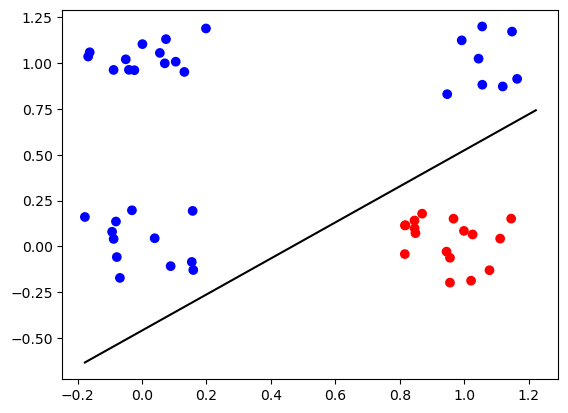

In [15]:
from matplotlib import colors

def plot_decision_boundary(X, Y, W, b):
    fig, ax = plt.subplots()
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']))
    
    x_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
    ax.plot(x_line, - W[0,0] / W[0,1] * x_line + -b[0,0] / W[0,1] , color="black")
    plt.plot()
    plt.show()
    
plot_decision_boundary(X, Y, W, b)

### Make predictions

Params: [[ 1.   1.   0.   0.   0.5 -0.   0.2  0.1]
 [ 0.   1.   0.   1.  -1.   0.3 -1.5  0.1]]
Predicted target values: [[ True False False False  True False  True False]]


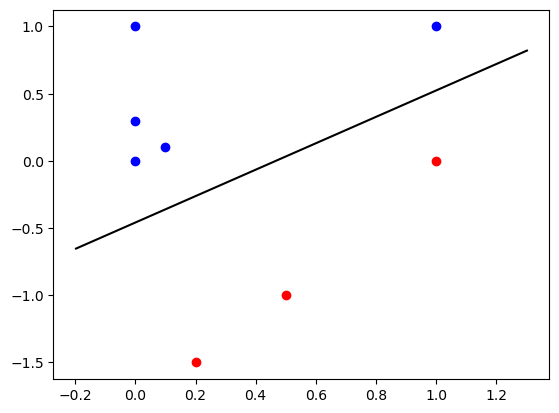

In [16]:
def predict(X, W, b):
    A = forward_propagation(X, W, b)
    predictions = A > 0.5
    
    return predictions

X_pred = np.array([[1, 1, 0, 0, 0.5, -0.0, 0.2, 0.1],
                   [0, 1, 0, 1, -1, 0.3, -1.5, 0.1]])
Y_pred = predict(X_pred, W, b)

print(f"Params: {X_pred}")
print(f"Predicted target values: {Y_pred}")

fig, ax = plt.subplots()

x_line = np.arange(np.min(X[-1,:]),np.max(X[-1,:])*1.1, 0.1)
ax.plot(x_line, - W[0,0] / W[0,1] * x_line + -b[0,0] / W[0,1] , color="black")

for idx,x in enumerate(X_pred[0]):
    if Y_pred[0][idx] == 1:
        color = 'r'
    else:
        color = 'b'
    ax.scatter(x, X_pred[1][idx], color=color)

plt.plot()
plt.show()

## Multiple neurons in hidden layer
Let's increase neurons in hidden layer and try to separate points in the center surrounded by other points

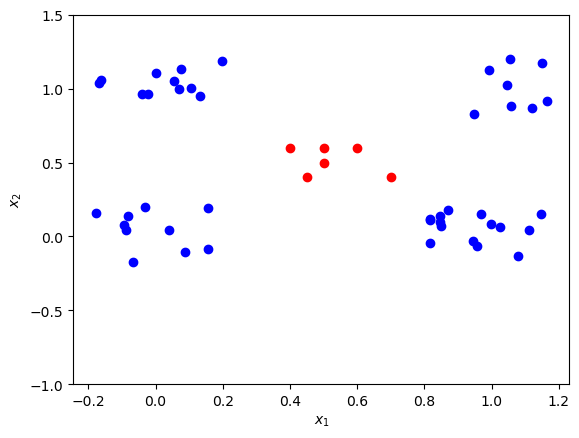

In [48]:
import numpy as np
np.random.seed(345)

m = 50

X = np.random.randint(0, 2, (2, m))
Y = np.full((1, m), 0, dtype="int")

# randomize points - add random values from range (-0.2, 0.2)
vfunc = np.vectorize(lambda x: x + np.random.uniform(-0.2, 0.2))
X = vfunc(X)

X[0][44] = 0.4
X[1][44] = 0.6
Y[0][44] = 1
X[0][45] = 0.7
X[1][45] = 0.4
Y[0][45] = 1
X[0][46] = 0.5
X[1][46] = 0.6
Y[0][46] = 1
X[0][47] = 0.6
X[1][47] = 0.6
Y[0][47] = 1
X[0][48] = 0.45
X[1][48] = 0.4
Y[0][48] = 1
X[0][49] = 0.5
X[1][49] = 0.5
Y[0][49] = 1

fig, ax = plt.subplots()
# Data points (observations) from two classes.
for idx,x in enumerate(X[0]):
    if Y[0][idx] == 1:
        color = 'r'
    else:
        color = 'b'
    ax.scatter(x, X[1][idx], color=color)

ax.set_ylim([-1, 1.5])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.plot()
plt.show()

In [50]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def init_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
    # Layer 1 (Hidden layer with 3 neurons)
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)

    # Layer 2 (Output layer)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    return A1, A2

def compute_cost(A2, Y):
    m = Y.shape[1]

    # compute cost
    logprobs = - np.multiply(np.log(A2), Y) - np.multiply(np.log(1 - A2), 1 - Y)
    cost = 1/m * np.sum(logprobs)

    return cost

def backward_propagation(A1, A2, X, Y, W2):
    m = X.shape[1]

    # Backprop for layer 2 (output layer)
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    # Backprop for layer 1 (hidden layer)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate=0.0001):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2

def nn_model(X, Y, n_h=3, num_iterations=10, learning_rate=0.0001, print_cost=False):

    n_x = X.shape[0]
    n_y = Y.shape[0]

    W1, b1, W2, b2 = init_params(n_x, n_h, n_y)

    for i in range(0, num_iterations):
        A1, A2 = forward_propagation(X, W1, b1, W2, b2)

        cost = compute_cost(A2, Y)

        dW1, db1, dW2, db2 = backward_propagation(A1, A2, X, Y, W2)

        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if print_cost:
            print(f"Cost after {i}: {cost}")

    return W1, b1, W2, b2

W1, b1, W2, b2 = nn_model(X, Y, num_iterations=50000, learning_rate=0.1, print_cost=True)

def predict(X, W1, b1, W2, b2):
    A1, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = A2 > 0.5

    return predictions

X_pred = np.array([[1, 1, 0, 0, 0.5, -0.0, 0.2, 0.1, 0.9, 0.5, 0.4],
                   [0, 1, 0, 1, -1, 0.3, -1.5, 0.1, 0.5, 0.6, 0.4]])
Y_pred = predict(X_pred, W1, b1, W2, b2)

print(f"Params: {X_pred}")
print(f"Predicted target values: {Y_pred}")


Cost after 0: 0.696071142839285
Cost after 1: 0.6710607640070759
Cost after 2: 0.6481921337725318
Cost after 3: 0.6272730266214358
Cost after 4: 0.6081268516822352
Cost after 5: 0.5905920369272193
Cost after 6: 0.5745212415255131
Cost after 7: 0.5597804616288462
Cost after 8: 0.5462480811570111
Cost after 9: 0.5338139069179952
Cost after 10: 0.5223782169693394
Cost after 11: 0.5118508425523774
Cost after 12: 0.5021502970950646
Cost after 13: 0.4932029604808682
Cost after 14: 0.48494232278610305
Cost after 15: 0.4773082887614058
Cost after 16: 0.4702465422587042
Cost after 17: 0.4637079683947486
Cost after 18: 0.4576481303379646
Cost after 19: 0.45202679707838644
Cost after 20: 0.4468075182883557
Cost after 21: 0.44195724232476125
Cost after 22: 0.4374459735008277
Cost after 23: 0.4332464649209307
Cost after 24: 0.4293339433917296
Cost after 25: 0.42568586317245555
Cost after 26: 0.42228168558903306
Cost after 27: 0.41910268179875615
Cost after 28: 0.4161317562464433
Cost after 29: 0.41

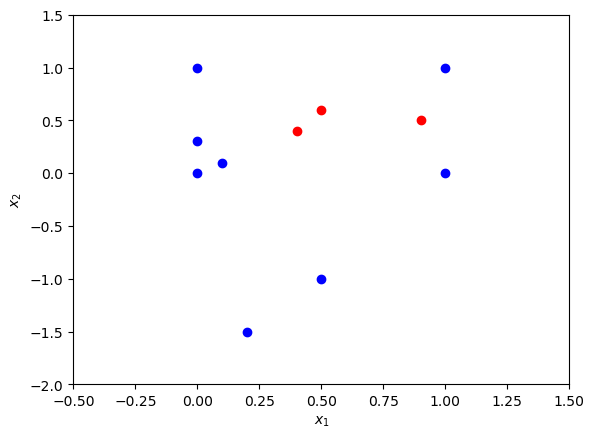

In [56]:
fig, ax = plt.subplots()
# Data points (observations) from two classes.
for idx,x in enumerate(X_pred[0]):
    if Y_pred[0][idx] == 1:
        color = 'r'
    else:
        color = 'b'
    ax.scatter(x, X_pred[1][idx], color=color)

ax.set_xlim([X_pred[0].min()-0.5, X_pred[0].max()+0.5])
ax.set_ylim([X_pred[1].min()-0.5, X_pred[1].max()+0.5])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.plot()
plt.show()